
# <span style="color:rgb(213,80,0)">Contaminated illness data.</span>

This file creates Figure 4.33.

## Beginning of code

In [1]:
load('illnessx07.txt');
y=illnessx07(:,4);
X=illnessx07(:,2:3);
listout=[17 53 30];
y(listout)=1;
y=log(y);
p=size(X,2)+1;
n=length(y);
prin=0;

## Prepare the input for Figure 4.43

Monitoring LXS Find LTS residuals


In [2]:
bdp=0.5:-0.01:0.01;
lbdp=length(bdp);
BIClxs=[bdp' zeros(lbdp,1)];
logn=log(n);
RES=zeros(n,lbdp);

Xwithintercept=[ones(n,1) X];
for j=1:lbdp
    [out]=LXS(y,X,'lms',2,'bdp',bdp(j),'nsamp',0,'msg',0);

    hh=out.h;
    if hh<n
        resj=(y-Xwithintercept*out.beta).*(out.weights);
        RES(:,j)=out.residuals;
        % Apply Tallis consistency factor
        vt = norminv(0.5*(1+hh/n));
        factor = 1/(1-2*(n/hh)*vt.*normpdf(vt));
        RSS=factor*resj'*(resj);
        BIClxs(j,2)=-n*log(RSS/hh)-logn*(p+n-hh);
    else
        beta=Xwithintercept\y;
        res=y-Xwithintercept*beta;
        RSS=res'*res;
        BIClxs(j,2)=-n*log(RSS/hh)-logn*p;
    end

end

## Create Figure 4.43

In [3]:
figure
% BIC with LTS
subplot(2,2,1)
plot(BIClxs(:,1),BIClxs(:,2))
xlabel('Break down point')
ylabel('BIC')
[~,indmax]=max(BIClxs(:,2));
ylim([min(BIClxs(:,2)) max(BIClxs(:,2))])
ax=axis;
xlim([0 0.5])

line(bdp(indmax)*ones(2,1), [ax(3); BIClxs(indmax,2)],'Color','r')
set(gca,'XDir','rev')

outpre=LXS(y,X,'nsamp',5000);

Total estimated time to complete LMS:  0.02 seconds


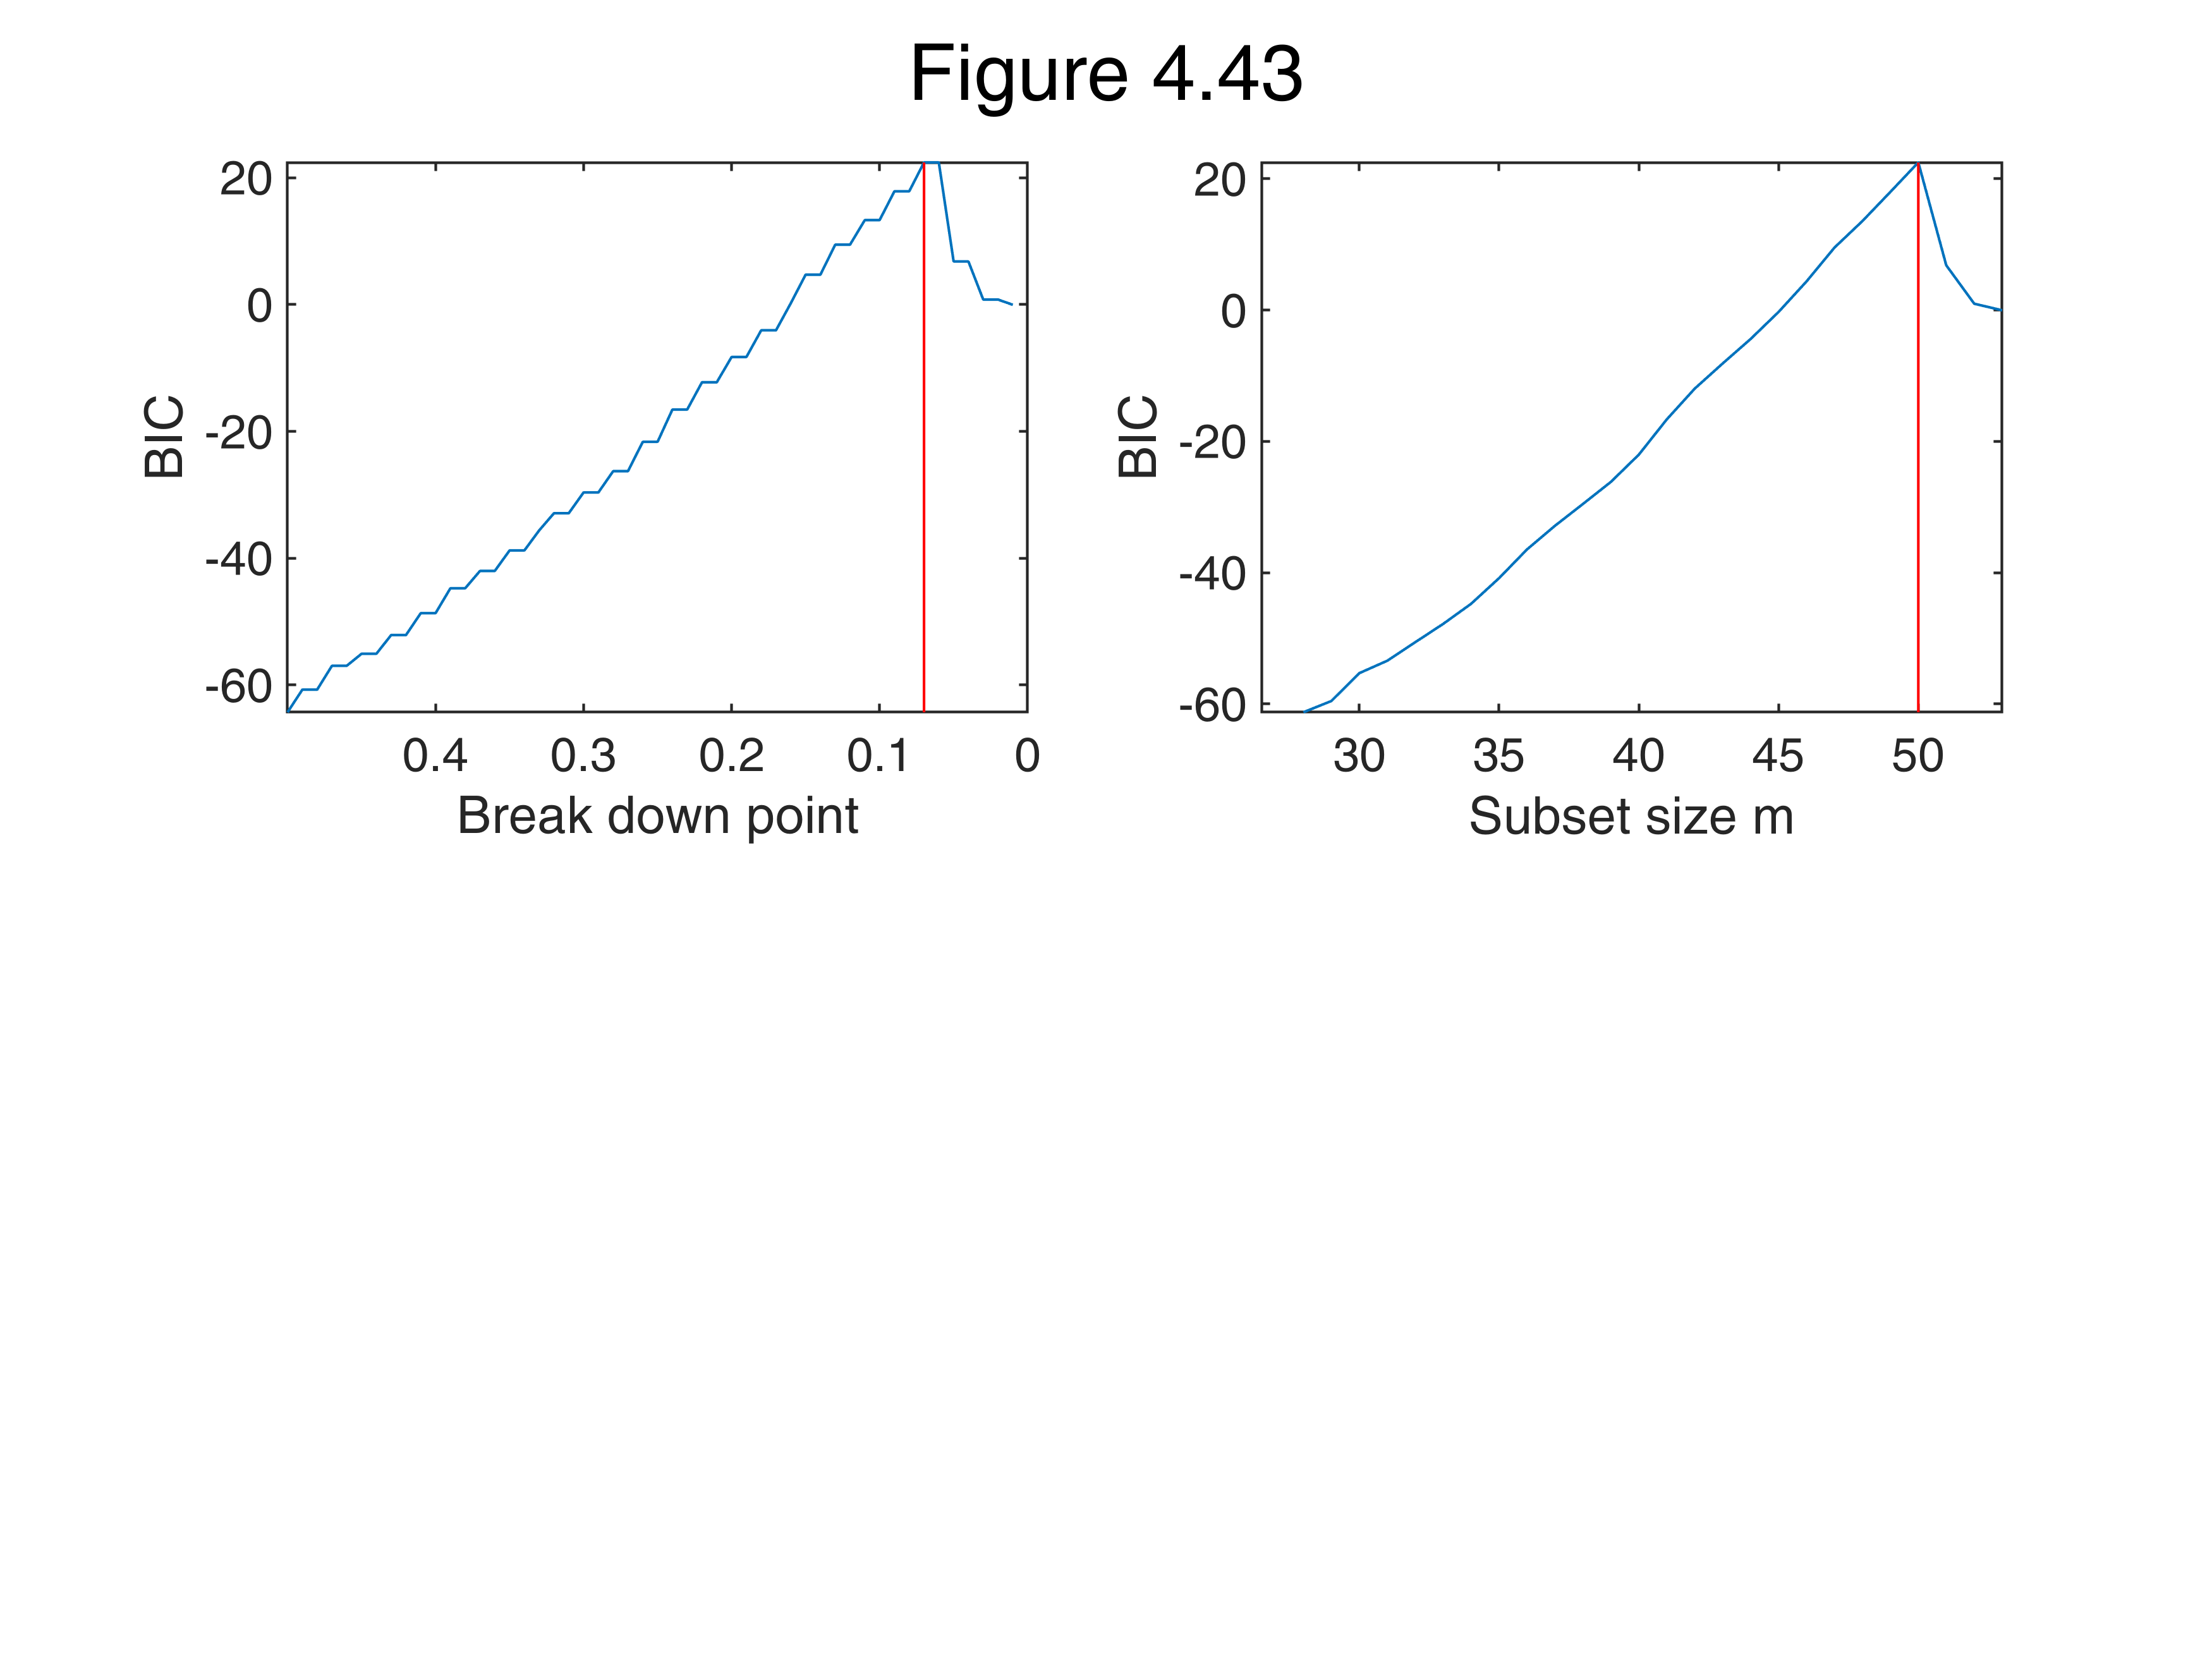

In [4]:
[Un,BB]=FSRbsb(y,X,outpre.bs,'init',round(n/2));
BICfs=[Un(:,1), zeros(size(Un,1),1)];
logn=log(n);
Xwithintercept=[ones(n,1) X];

for j=2:size(BB,2)
    boo=~isnan(BB(:,j));
    hh=sum(boo);
    Xb=Xwithintercept(boo,:);
    yb=y(boo);
    beta=Xb\yb;
    resj=yb-Xb*beta;
    if hh<n
        % Apply Tallis consistency factor
        vt = norminv(0.5*(1+hh/n));
        factor = 1/(1-2*(n/hh)*vt.*normpdf(vt));
        RSS=factor*resj'*(resj);
    else
        RSS=resj'*resj;
    end
        BICfs(j-1,2)=-n*log(RSS/hh)-logn*(p+n-hh);
end

% Plot BIC FOR FS
subplot(2,2,2)
plot(BICfs(:,1),BICfs(:,2))
xlabel('Subset size m')
ylabel('BIC')
[~,indmax]=max(BICfs(:,2));
ax=axis;

line(BICfs(indmax,1)*ones(2,1), [ax(3); BICfs(indmax,2)],'Color','r')
xlim([n/2 n])
ylim([min(BICfs(:,2)) max(BICfs(:,2))])

if prin==1
    % print to postscript
    print -depsc figs\CI1.eps;

end

sgtitle('Figure 4.43')
set(gcf,"Name",'Figure 4.43')

In [5]:

%InsideREADME